<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Исходя из условия, очевидно, что перед нами задача регрессии

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(data_1)
display(data_2)
display(data_3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [4]:
data_1.info()
data_2.info()
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Кол-во дубликатов: 0
Распределения значений столбцов: [[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}> <AxesSubplot:>]]


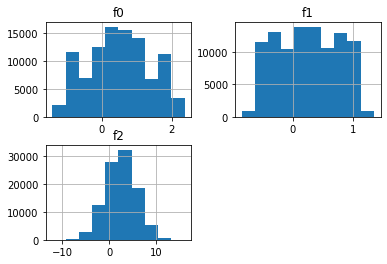

In [5]:
def data_info(data):
    print('Кол-во пропусков:', data.isna().sum())
    print('Кол-во дубликатов:', data.duplicated().sum())
    print('Распределения значений столбцов:', data[['f0', 'f1', 'f2']].hist())


data_info(data_1)

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Кол-во дубликатов: 0
Распределения значений столбцов: [[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}> <AxesSubplot:>]]


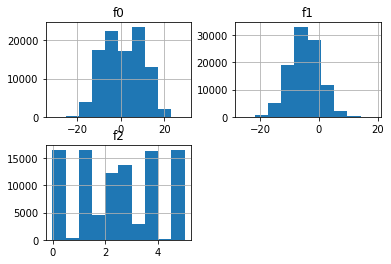

In [6]:
data_info(data_2)

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Кол-во дубликатов: 0
Распределения значений столбцов: [[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}> <AxesSubplot:>]]


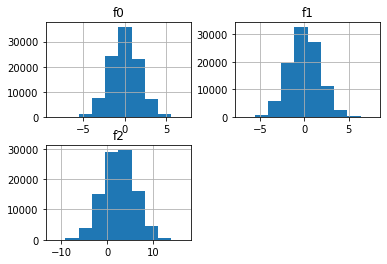

In [7]:
data_info(data_3)

In [8]:
features_1 = data_1[['f0', 'f1', 'f2']]
features_2 = data_2[['f0', 'f1', 'f2']]
features_3 = data_3[['f0', 'f1', 'f2']]

target_1 = data_1['product']
target_2 = data_2['product']
target_3 = data_3['product']

Сильного разброса в значениях столбцов f0, f1, f2 не наблюдается, поэтому нет смысла их масштабировать 

In [9]:
state = np.random.RandomState(12345)

## Обучение и проверка модели

In [10]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, \
                                                                                      test_size = 0.25, random_state = state)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, \
                                                                                      test_size = 0.25, random_state = state)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3, target_3, \
                                                                                      test_size = 0.25, random_state = state)

In [11]:
features_train = [features_train_1, features_train_2, features_train_3]
features_valid = [features_valid_1, features_valid_2, features_valid_3]
target_train = [target_train_1, target_train_2, target_train_3]
target_valid = [target_valid_1, target_valid_2, target_valid_3]


for i in range(3):
    print(features_train[i].shape, features_valid[i].shape, target_train[i].shape, target_valid[i].shape)

(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)


In [12]:
model = LinearRegression()
prediction = [0, 0, 0]
for i in range(3):
    model.fit(features_train[i], target_train[i])
    prediction[i] = model.predict(features_valid[i])
    rmse = mean_squared_error(target_valid[i], prediction[i], squared=False)
    print('Значение RMSE для ', i+1,'-го региона равно:', rmse)
    print('Средний запас предсказанного сырья:', prediction[i].mean(), '\n')


Значение RMSE для  1 -го региона равно: 37.5794217150813
Средний запас предсказанного сырья: 92.59256778438035 

Значение RMSE для  2 -го региона равно: 0.889736773768065
Средний запас предсказанного сырья: 68.76995145799754 

Значение RMSE для  3 -го региона равно: 39.958042459521614
Средний запас предсказанного сырья: 95.087528122523 



Самый низкий RMSE у 2-го региона, причем он очень сильно отличается от показателей своих собратьев. Что-то мне подсказывает, что именно этот регион будет наилучшим по итог исследования

## Подготовка к расчёту прибыли

In [13]:
budget = 10**10
n_spot = 500
n_best_spot = 200
price = 450000
alpha = 0.025

In [14]:
min_volume = budget/price
print('Минимальный объем сырья в регионе для безубыточной разработки новой скважины равен:', min_volume)

Минимальный объем сырья в регионе для безубыточной разработки новой скважины равен: 22222.222222222223


In [15]:
print('В среднем, в каждой скважине должно быть:', min_volume/200, 'тыс. баррелей нефти для безубыточной разработки')

В среднем, в каждой скважине должно быть: 111.11111111111111 тыс. баррелей нефти для безубыточной разработки


In [16]:
for i in range(3):
    print('Средний запас в регионге', i+1, 'равен:', target_valid[i].mean())

Средний запас в регионге 1 равен: 92.07859674082927
Средний запас в регионге 2 равен: 68.77162424984647
Средний запас в регионге 3 равен: 94.74895871720241


Средней объем сырья в скважинах, в каджом из регионов, меньше минимального среднего объема для безубыточной разработки

Возможно дело в том, что мы сравниваем среднии показатели и там и там. Из-за этого и получается, что показатель rmse как будто не влияет

## Расчёт прибыли и рисков 

In [17]:
    
def profit(predict, target):
    predict.reset_index(drop=True, inplace=True)
    target.reset_index(drop=True, inplace=True)
    predict = predict.sort_values(ascending=False).head(n_best_spot)

    if target[predict.index].shape[0] != predict.shape[0]:
        print("Shape mismatch! Targets shape:", target[predict.index].shape[0])
    target = target[predict.index].head(n_best_spot)


    return target.sum()*price-budget

 
for i in range(3):
    prediction[i] = pd.Series(prediction[i], index=target_valid[i].index)
    print('Прибыль для региона', i+1, 'равна:', profit(prediction[i], target_valid[i]), '\n')

Прибыль для региона 1 равна: 3320826043.1398506 

Прибыль для региона 2 равна: 2415086696.681511 

Прибыль для региона 3 равна: 2539915945.842947 



In [21]:
def bootstrap_and_more(predict, target):
    distribution = []
    for i in range(1000):
        target_subsample = target.sample(n_spot, replace=True, random_state=state)
        predict_subsample = predict[target_subsample.index]
        distribution.append(profit(predict_subsample, target_subsample))
        
    low = np.percentile(distribution, 2.5)
    high = np.percentile(distribution, 97.5)

    negative = 0
    for i in range(len(distribution)):
        if distribution[i] < 0:
            negative += 1

    risk = negative/len(distribution)
    mean_profit = pd.Series(distribution).mean()
    return (mean_profit, (low, high), risk)

In [22]:
for i in range(3):
    mean_profit, interval, risk = bootstrap_and_more(prediction[i], target_valid[i])
    print('Средняя прибыль в регионе', i+1, 'равна:', mean_profit, '\n')
    print('95-й доверительный интервал равен:', interval, '\n')
    print('% риска равен: {:.1%}'.format(risk), '\n')
    print('')

Средняя прибыль в регионе 1 равна: 394284411.3405507 

95-й доверительный интервал равен: (-69450566.85672115, 915496165.8311511) 

% риска равен: 6.1% 


Средняя прибыль в регионе 2 равна: 454736359.0973578 

95-й доверительный интервал равен: (61071811.297698975, 855914149.1428356) 

% риска равен: 0.7% 


Средняя прибыль в регионе 3 равна: 353664097.5248346 

95-й доверительный интервал равен: (-162650946.9422927, 847761844.5147682) 

% риска равен: 7.6% 




## Вывод

Наиболее выгодный регион: 2-й.
Он имеет: 
1. Самую высокую среднюю прибыль
2. 95-й доверительный интервал, в котором нижний и верхние пределы положительны, когда как в остальных регионах нижний предел иногда становится отрицательным.
3. Самый низкий процент риска: всего 1-2%

----------